In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
"""
thriller_plot = pd.read_csv('/Users/yangyoonji/Documents/2020-1/2020-dataCapstone/data/moviedata/moviePlot/thrillerPlot.csv')
drama_plot = pd.read_csv('/Users/yangyoonji/Documents/2020-1/2020-dataCapstone/data/moviedata/moviePlot/dramaPlot.csv')
fantasy_plot = pd.read_csv('/Users/yangyoonji/Documents/2020-1/2020-dataCapstone/data/moviedata/moviePlot/fantasyPlot.csv')
history_plot = pd.read_csv('/Users/yangyoonji/Documents/2020-1/2020-dataCapstone/data/moviedata/moviePlot/historyPlot.csv')
social_plot = pd.read_csv('/Users/yangyoonji/Documents/2020-1/2020-dataCapstone/data/moviedata/moviePlot/socialPlot.csv')
romance_plot = pd.read_csv('/Users/yangyoonji/Documents/2020-1/2020-dataCapstone/data/moviedata/moviePlot/romancePlot.csv')
musical_plot = pd.read_csv('/Users/yangyoonji/Documents/2020-1/2020-dataCapstone/data/musicalData/broadMusicalPlot.csv',encoding='cp949')

# /Users/김서영/Desktop/datacap/data/moviedata/moviePlot/romancePlot.csv
"""
romance_plot = pd.read_csv('/Users/김서영/Desktop/datacap/data/moviedata/moviePlot/romancePlot.csv')
thriller_plot = pd.read_csv('/Users/김서영/Desktop/datacap/data/moviedata/moviePlot/thrillerPlot.csv')
drama_plot = pd.read_csv('/Users/김서영/Desktop/datacap/data/moviedata/moviePlot/dramaPlot.csv')
fantasy_plot = pd.read_csv('/Users/김서영/Desktop/datacap/data/moviedata/moviePlot/fantasyPlot.csv')
history_plot = pd.read_csv('/Users/김서영/Desktop/datacap/data/moviedata/moviePlot/historyPlot.csv')
social_plot = pd.read_csv('/Users/김서영/Desktop/datacap/data/moviedata/moviePlot/socialPlot.csv')
non_plot = pd.read_csv('/Users/김서영/Desktop/datacap/data/moviedata/moviePlot/nonPlot.csv')

musical_plot = pd.read_csv('/Users/김서영/Desktop/datacap/data/musicalData/broadMusicalPlot.csv',encoding='cp949')


print(len(romance_plot)) #5699 ==> train 2500 test 2500
print(len(thriller_plot)) #9823 ==> train 2500 test 2500
print(len(drama_plot))
print(len(fantasy_plot)) #2727
print(len(history_plot))
print(len(social_plot))

print(len(non_plot))

"""
train_data_size = 732*6
test_data_size = 732*6
"""

5699
9823
14020
2727
1498
1464
8286


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


'\ntrain_data_size = 732*6\ntest_data_size = 732*6\n'

In [2]:
#전체 레이블
each_len = 1350

train_labels = []
test_labels = []

RM_train = [[] for _ in range(2000)]
RM_test = [[] for _ in range(700)]

for i in range(2700):
    if i < 2000:
        RM_train[i].append(''.join(romance_plot.줄거리[i]))
        train_labels.append(0)
    else:
        j = i - 2000 
        RM_test[j].append(''.join(romance_plot.줄거리[i]))
        test_labels.append(0)

TH_train = [[] for _ in range(2000)]
TH_test = [[] for _ in range(700)]
for i in range(2700):
    if i < 2000:
        TH_train[i].append(''.join(thriller_plot.줄거리[i+700]))
        train_labels.append(1)
    else:
        j = i - 2000 
        TH_test[j].append(''.join(thriller_plot.줄거리[i-1999]))
        test_labels.append(1)
      
        
FN_train = [[] for _ in range(2000)]
FN_test = [[] for _ in range(700)]
for i in range(2700):
    if i < 2000:
        FN_train[i].append(''.join(fantasy_plot.줄거리[i]))
        train_labels.append(2)
    else:
        j = i - 2000 
        FN_test[j].append(''.join(fantasy_plot.줄거리[i]))
        test_labels.append(2)

HS_train = [[] for _ in range(1000)]
HS_test = [[] for _ in range(350)]
for i in range(each_len):
    if i < 1000:
        HS_train[i].append(''.join(history_plot.줄거리[i]))
        train_labels.append(3)
    else:
        j = i- 1000
        HS_test[j].append(''.join(history_plot.줄거리[i]))
        test_labels.append(3)
       
"""    
SC_train = [[] for _ in range(1000)]
SC_test = [[] for _ in range(350)]
for i in range(1350):
    if i < 1000:
        SC_train[i].append(''.join(social_plot.줄거리[i]))
        train_labels.append(3)
    else:
        j = i-1000
        SC_test[j].append(''.join(social_plot.줄거리[i]))
        test_labels.append(3)
  

NN_train = [[] for _ in range(2000)]
NN_test = [[] for _ in range(700)]
for i in range(2700):
    if i < 2000:
        NN_train[i].append(''.join(non_plot.줄거리[i]))
        train_labels.append(3)
    else:
        j = i - 2000 
        NN_test[j].append(''.join(non_plot.줄거리[i]))
        test_labels.append(3)        

DR_train = [[] for _ in range(732)]
DR_test = [[] for _ in range(732)]
for i in range(1464):
    if i < 732:
        DR_train[i].append(''.join(drama_plot.줄거리[i]))
        train_labels.append(5)
    else:
        j = 732 - i
        DR_test[j].append(''.join(drama_plot.줄거리[i]))
        test_labels.append(5)
 """   
Mu = [[] for _ in range(307)]
for i in range(307):
    Mu[i].append(''.join(musical_plot.muplot[i]))
   

In [3]:
#allplot = RM_train+TH_train+FN_train+HS_train+SC_train+DR_train+RM_test+TH_test+FN_test+HS_test+SC_test+DR_test
allplot = RM_train+RM_test+HS_train+HS_test+TH_train+FN_train+TH_test+FN_test#+HS_train+SC_train+HS_test+SC_test 

In [4]:
alltrain = RM_train+TH_train+FN_train+HS_train 
alltest = RM_test+TH_test+FN_test+HS_test

In [5]:
train_data_size = 7000
test_data_size = 2450
print(len(alltrain))
print(len(alltest))

print(HS_test[3])

7000
2450
['In 1983, off-duty policeman Reiden picks up a suspicious couple, Kei and Ai, who claim to be father and daughter but appear to be close in age. Reiden thus becomes involved in a fight between them and the female fighter K2 who is chasing them. Kei draws out his latent ability to the maximum by a Legendary "Trigger" and Ai blows away K2. The night sky splits and strange space is shown. Their enemy is the secret society "Fraud" of para-psionics, which is commanded by Kuu Ragua Lee. Kei, Ai and Reiden meet the assassins whom Fraud sends out one after another.']


In [6]:
from tqdm import tqdm
all_vocab = {} 
all_sentences = []
stop_words = set(stopwords.words('english'))

for i in tqdm(allplot):
    all_sentences = word_tokenize(str(i)) # 단어 토큰화를 수행합니다.
    result = []
    for word in all_sentences: 
        word = word.lower() # 모든 단어를 소문자화하여 단어의 개수를 줄입니다.
        if word not in stop_words: # 단어 토큰화 된 결과에 대해서 불용어를 제거합니다.
            if len(word) > 2: # 단어 길이가 2이하인 경우에 대하여 추가로 단어를 제거합니다.
                result.append(word)
                if word not in all_vocab:
                    all_vocab[word] = 0 
                all_vocab[word] += 1
    all_sentences.append(result) 
    
all_vocab_sorted = sorted(all_vocab.items(), key = lambda x:x[1], reverse = True)

#전처리(4) 인덱스 부여
all_word_to_index = {}
i=0
for (word, frequency) in all_vocab_sorted :
    if frequency > 1 : # 정제(Cleaning) 챕터에서 언급했듯이 빈도수가 적은 단어는 제외한다.
        i=i+1
        all_word_to_index[word] = i
#print(all_word_to_index)

vocab_size = 15000 #상위 15000개 단어만 사용
words_frequency = [w for w,c in all_word_to_index.items() if c >= vocab_size + 1] # 인덱스가 200 초과인 단어 제거
for w in words_frequency:
    del all_word_to_index[w] # 해당 단어에 대한 인덱스 정보를 삭제

    
all_word_to_index['OOV'] = len(all_word_to_index) + 1

100%|█████████████████████████████████████████████████████████████████████████████| 9450/9450 [01:14<00:00, 127.26it/s]


## 2. 학습 데이터 정리

### 인코딩

In [7]:
vocab = {} 
sentences = []
stop_words = set(stopwords.words('english'))

for i in tqdm(alltrain):
    sentence = word_tokenize(str(i)) # 단어 토큰화를 수행합니다.
    result = []

    for word in sentence: 
        word = word.lower() # 모든 단어를 소문자화하여 단어의 개수를 줄입니다.
        if word not in stop_words: # 단어 토큰화 된 결과에 대해서 불용어를 제거합니다.
            if len(word) > 2: # 단어 길이가 2이하인 경우에 대하여 추가로 단어를 제거합니다.
                result.append(word)
                if word not in vocab:
                    vocab[word] = 0 
                vocab[word] += 1
    sentences.append(result) 

train_encoded = []
for s in sentences:
    temp = []
    for w in s:
        try:
            temp.append(all_word_to_index[w])
        except KeyError:
            temp.append(all_word_to_index['OOV'])
    train_encoded.append(temp)


100%|█████████████████████████████████████████████████████████████████████████████| 7000/7000 [00:57<00:00, 121.22it/s]


In [8]:
X_train = []
Y_train = []
for i in range(train_data_size):
    label = [0,0,0,0]
    X_train.append(train_encoded[i])
    idx = train_labels[i]
    label[idx] = 1
    Y_train.append(label)

In [9]:
print(X_train[6000])

[692, 9385, 2345, 110, 65, 7, 853, 2276, 4248, 3049, 72, 15001, 252, 8415, 1097, 650, 15001, 102, 2501, 6068, 4184, 15001, 1371, 15001, 15001, 8535, 15001, 6187, 256, 3049, 11382, 2933, 2704, 1655, 638, 3049, 15001, 3443, 5395, 7992, 6877, 4524, 1810, 5157, 5857, 15001, 15001, 7287, 15001, 6816, 15001, 15001, 9320, 15001, 58, 14362, 3443, 15001, 11256, 15001, 30, 3332, 15001, 15001, 80, 15001, 13460, 15001, 15001, 1346, 4880, 647, 3049, 1208, 4407, 15001, 15001, 6326, 15001, 2273, 5330, 507, 1614, 15001, 93, 3147, 2273, 324, 3917, 15001, 8463, 4088, 3917, 15001, 15001, 6192, 132, 14085, 12141, 1985, 3899, 7663, 6634, 15001, 931, 15001, 46, 1710, 2276, 5699, 15001, 4850, 3443, 1104, 2095, 1313, 3407, 15001, 833, 15001, 2456, 221, 4125, 3049, 1451, 436, 15001, 15001, 11221, 3443, 1218, 8415, 436, 13189, 15001, 196, 27, 15001, 252, 3443, 80, 15001, 1363, 13056, 2456, 5536, 3443, 94, 3588, 15001, 7648, 6068, 3999, 7097, 15001, 15001, 2911, 1196, 3917, 15001, 15001, 358, 15001, 199, 2373, 2

### [ 학습 데이터 ]

줄거리 최대 길이 :  2324
줄거리 평균 길이 :  234.355


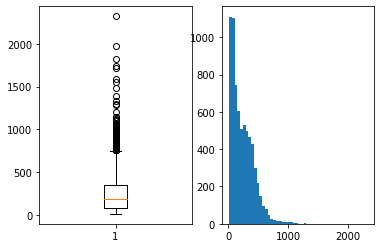

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

len_result = [len(s) for s in X_train]
print("줄거리 최대 길이 : ",max(len_result))
print("줄거리 평균 길이 : ",sum(len_result)/len(len_result))

plt.subplot(1,2,1)
plt.boxplot(len_result)
plt.subplot(1,2,2)
plt.hist(len_result, bins=50)
plt.show()

In [11]:
print(Y_train[6999])
print(X_train[701])

[0, 0, 0, 1]
[652, 15001, 130, 607, 576, 2448, 1656, 57, 943, 2956, 14, 157, 1539, 11530, 4330, 1539, 809, 652, 5218, 607, 2453, 2751, 9090, 5156, 652, 1196, 8, 4302, 8345, 15001, 339, 607, 7879, 19, 2575, 2720, 32, 1787, 29, 3, 127, 652, 3074, 15001, 544, 9387, 339, 650, 62, 3490, 9839, 1461, 15001, 21, 523, 17, 2, 1870, 146, 3104, 15001, 117, 235, 235, 53, 15001, 2664, 1237, 1832, 15001, 652, 1656, 1076, 607, 2720, 883, 212, 1095, 15001, 1126, 176, 15001, 8851, 15001, 1320, 15001, 15001, 1231, 19, 661, 393, 12959, 1790, 1372, 766, 652, 55, 1237, 50, 98, 6526, 15001, 36, 15001, 3074, 14, 652, 138, 1427, 1480, 58, 1037, 390, 168, 1818, 26, 599, 5601, 296, 420, 15, 9387, 107, 15001, 862, 181, 604, 55, 15001, 8085, 1608, 10714, 607, 1656, 2741, 1076, 685, 1613, 1351, 439, 406, 5398, 2592, 4495, 1320, 2575, 278, 3450, 607, 1769, 57, 439, 3183, 3426, 7573, 15001, 3646, 652, 61, 387, 607, 254, 57, 1790, 3355, 1987, 1237, 1656, 15001, 16, 103, 607, 502, 29, 226, 4621, 14, 176, 1, 241, 303, 2

## 3. 테스트 데이터 정리

### 인코딩

In [12]:
###
vocab1 = {} 
sentences1 = []
stop_words1 = set(stopwords.words('english'))

for i in tqdm(alltest):
    sentence1 = word_tokenize(str(i)) # 단어 토큰화를 수행합니다.
    result1 = []

    for word in sentence1: 
        word = word.lower() # 모든 단어를 소문자화하여 단어의 개수를 줄입니다.
        if word not in stop_words1: # 단어 토큰화 된 결과에 대해서 불용어를 제거합니다.
            if len(word) > 2: # 단어 길이가 2이하인 경우에 대하여 추가로 단어를 제거합니다.
                result1.append(word)
                if word not in vocab1:
                    vocab1[word] = 0 
                vocab1[word] += 1
    sentences1.append(result1) 

test_encoded = []
for s in sentences1:
    temp = []
    for w in s:
        try:
            temp.append(all_word_to_index[w])
        except KeyError:
            temp.append(all_word_to_index['OOV'])
    test_encoded.append(temp)


100%|█████████████████████████████████████████████████████████████████████████████| 2450/2450 [00:19<00:00, 123.36it/s]


In [13]:
X_test = []
Y_test = []
for i in range(test_data_size):
    label = [0,0,0,0]
    X_test.append(test_encoded[i])
    idx = test_labels[i]
    label[idx] = 1
    Y_test.append(label)

### [ 테스트 데이터 ]

줄거리 최대 길이 :  2593
줄거리 평균 길이 :  203.25755102040816


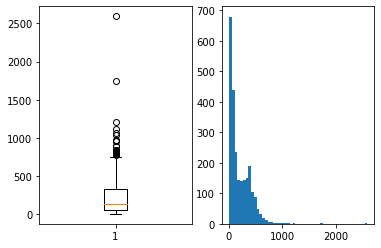

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

len_result = [len(s) for s in X_test]
print("줄거리 최대 길이 : ",max(len_result))
print("줄거리 평균 길이 : ",sum(len_result)/len(len_result))

plt.subplot(1,2,1)
plt.boxplot(len_result)
plt.subplot(1,2,2)
plt.hist(len_result, bins=50)
plt.show()

In [15]:
print(Y_test[1])
print(X_test[1])


[1, 0, 0, 0]
[15001, 11704, 354, 691, 447, 2738, 2441, 15001, 11, 220, 163, 447, 658, 15001, 996, 261, 792, 313, 329, 40, 45, 69, 2738, 4051, 432, 2157, 4968, 70, 2738, 119, 440, 11, 447, 2674, 119, 8, 2108, 257, 386, 1785, 784, 2735, 102, 467, 688, 379, 13040, 15001, 789, 279, 226, 265, 1640, 91, 9333, 113, 18]


## 뮤지컬 데이터 정리

In [16]:
from tqdm import tqdm
Mu_vocab = {} 
Mu_sentences = []

for i in tqdm(Mu):
    Mu_sentence = word_tokenize(str(i)) # 단어 토큰화를 수행합니다.
    result = []
    
    for word in Mu_sentence: 
        word = word.lower() # 모든 단어를 소문자화하여 단어의 개수를 줄입니다.
        if word not in stop_words: # 단어 토큰화 된 결과에 대해서 불용어를 제거합니다.
            if len(word) > 2: # 단어 길이가 2이하인 경우에 대하여 추가로 단어를 제거합니다.
                result.append(word)
                if word not in Mu_vocab:
                    Mu_vocab[word] = 0 
                Mu_vocab[word] += 1

    Mu_sentences.append(result) 
    
    
Mu_encoded = []
for s in Mu_sentences:
    temp = []
    for w in s:
        try:
            temp.append(all_word_to_index[w])
        except KeyError:
            temp.append(all_word_to_index['OOV'])
    Mu_encoded.append(temp)

100%|███████████████████████████████████████████████████████████████████████████████| 307/307 [00:00<00:00, 653.38it/s]


## 4. LSTM 분류 

In [58]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np


M_test=Mu_encoded
M_test= np.array(M_test)
max_len = 230
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

model = Sequential()
model.add(Embedding(15002, 120))
model.add(LSTM(128))
model.add(Dense(4, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=7, batch_size=64, callbacks=[es, mc])

Train on 7000 samples, validate on 2450 samples
Epoch 1/7
6976/7000 [============================>.] - ETA: 0s - loss: 1.2966 - acc: 0.4074
Epoch 00001: val_acc improved from -inf to 0.46367, saving model to best_model.h5
7000/7000 [==============================] - 71s 10ms/sample - loss: 1.2965 - acc: 0.4076 - val_loss: 1.2583 - val_acc: 0.4637
Epoch 2/7
6976/7000 [============================>.] - ETA: 0s - loss: 0.8872 - acc: 0.6608
Epoch 00002: val_acc improved from 0.46367 to 0.58980, saving model to best_model.h5
7000/7000 [==============================] - 69s 10ms/sample - loss: 0.8868 - acc: 0.6611 - val_loss: 1.0250 - val_acc: 0.5898
Epoch 3/7
6976/7000 [============================>.] - ETA: 0s - loss: 0.6036 - acc: 0.7808
Epoch 00003: val_acc did not improve from 0.58980
7000/7000 [==============================] - 80s 11ms/sample - loss: 0.6033 - acc: 0.7810 - val_loss: 1.2084 - val_acc: 0.5731
Epoch 4/7
 768/7000 [==>...........................] - ETA: 1:07 - loss: 0.390

KeyboardInterrupt: 

## 뮤지컬 데이터 분류 

In [59]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

M_test = pad_sequences(M_test, maxlen=max_len)
predictions = model.predict(M_test)
print(predictions)
predict_labels = np.argmax(predictions, axis = 1)


[[0.38870266 0.02433592 0.07328184 0.51367956]
 [0.6450228  0.05261524 0.04859437 0.25376767]
 [0.9823596  0.00549819 0.00262331 0.00951902]
 ...
 [0.49974144 0.09077708 0.2564418  0.1530396 ]
 [0.22712483 0.24804659 0.28475055 0.24007803]
 [0.9531947  0.03475152 0.00676594 0.00528788]]


In [60]:
ro = list(predict_labels).count(0)
th = list(predict_labels).count(1)
fn = list(predict_labels).count(2)
his = list(predict_labels).count(3)
data = [ro, th, fn,his]

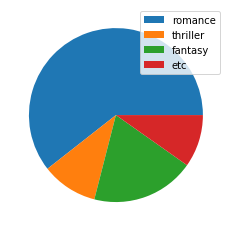

In [61]:
from matplotlib import pyplot as plt
plt.pie(data)
categories = ['romance', 'thriller', 'fantasy', 'etc']
plt.legend(categories)
plt.show()


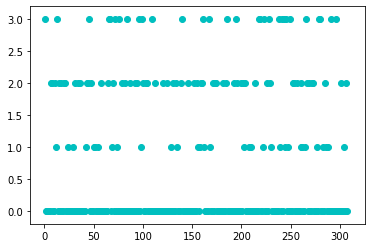

In [62]:
for i in range(len(M_test)):
    plt.scatter(i+1, predict_labels[i],color = 'c')

In [63]:
print(predict_labels)

[3 0 0 0 0 0 2 2 0 0 2 1 3 0 2 0 2 0 0 2 2 0 0 1 0 0 0 0 1 0 2 0 0 2 0 2 0
 0 0 0 0 1 2 2 3 0 2 0 0 1 1 0 0 1 0 0 2 0 0 0 0 0 0 0 2 3 3 0 1 2 0 3 0 1
 0 3 0 0 2 0 0 2 0 3 0 0 2 0 0 0 0 2 0 2 0 3 0 1 3 2 0 0 2 2 0 0 0 0 3 0 0
 2 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1 0 2 0 0 2 1 0 0 0 2 3 0 0 0 0 0 2 0 0
 0 0 0 2 0 0 2 1 0 1 2 2 3 1 0 0 0 0 3 1 0 0 2 0 2 2 0 0 0 0 0 0 2 0 0 2 3
 0 0 0 0 0 0 2 0 0 3 2 0 0 0 2 0 2 1 2 0 0 0 1 0 1 0 0 0 2 0 0 0 3 3 0 0 1
 3 0 0 2 0 3 2 1 0 0 0 0 0 0 0 3 1 0 3 0 3 1 3 0 1 0 3 0 0 2 2 0 0 2 0 0 0
 2 1 1 0 0 1 3 2 0 2 0 0 2 2 0 0 0 1 0 3 3 0 0 1 0 2 1 0 1 0 0 3 0 0 0 0 3
 0 0 0 0 2 0 0 1 0 2 0]


### 확인 : 오페라의 유령

In [64]:
print(Mu[226])

['The 1988 Tony Award-winner for Best Musical features the work of Andrew Lloyd Webber and is the longest-running show in Broadway history.Story:It is 1881 and the backdrop in the notoriously haunted Op챕ra Populaire has just mysteriously fallen during rehearsal frightening the star performer from continuing with the show and forcing young Christine to be recast in the role.  After opening the production the Phantom abducts Christine and brings her to his lair and reveals his love for her.  When the Phantom discovers that Christine is already in love with Raoul he vows to destroy him - a promise that leads both him and Christine to a dramatic discovery of the true power of music and love. ']


In [65]:
print(predict_labels[226])

0


장르 색이 강한 오페라의 유령 같은 데이터에 대해서는 항상 정확한 값이 나오는 것을 확인할 수 있음!
영화처럼 전체 내용이 다 나와 있는 것이 아니라서 정확도가 떨어지는 경우 발생

## END